In [ ]:
pip install ta

In [ ]:
pip install mplfinance

In [ ]:
import pandas as pd
import numpy as np
# yfinance to fetch data
import yfinance as yf
#to import EMA indicator
from ta.trend import EMAIndicator
#to plot graph
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
# KNN model
from sklearn.neighbors import KNeighborsClassifier
#random forest Classifer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report
# to split data into train test split for training and testing
from sklearn.model_selection import train_test_split


In [ ]:
# deep learing useing keras regressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
#deep learing
from sklearn import metrics

Ticket of nifty to importing data from yahoo finance.
1 month data is imported with interval of 2 minutes.

note -ERROR:yfinance:['^NSEI']: YFChartError('%ticker%: Invalid input - interval=3m is not supported. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]')

In [ ]:
ticker = "^NSEI"
data = yf.download(ticker, period="1mo", interval="2m")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-06-18 09:15:00+05:30,23561.199219,23561.199219,23518.900391,23530.849609,23530.849609,0
2024-06-18 09:17:00+05:30,23530.000000,23544.300781,23523.199219,23524.050781,23524.050781,0
2024-06-18 09:19:00+05:30,23522.900391,23538.349609,23519.250000,23534.150391,23534.150391,0
2024-06-18 09:21:00+05:30,23533.000000,23538.699219,23518.900391,23519.599609,23519.599609,0
2024-06-18 09:23:00+05:30,23520.000000,23520.099609,23503.449219,23517.550781,23517.550781,0


In [ ]:
print(data.iloc[1:10])

                                   Open          High           Low  \
Datetime                                                              
2024-06-18 09:17:00+05:30  23530.000000  23544.300781  23523.199219   
2024-06-18 09:19:00+05:30  23522.900391  23538.349609  23519.250000   
2024-06-18 09:21:00+05:30  23533.000000  23538.699219  23518.900391   
2024-06-18 09:23:00+05:30  23520.000000  23520.099609  23503.449219   
2024-06-18 09:25:00+05:30  23517.650391  23526.750000  23500.400391   
2024-06-18 09:27:00+05:30  23501.900391  23513.800781  23500.500000   
2024-06-18 09:29:00+05:30  23501.849609  23528.800781  23501.849609   
2024-06-18 09:31:00+05:30  23515.949219  23535.550781  23515.949219   
2024-06-18 09:33:00+05:30  23538.199219  23554.750000  23538.199219   

                                  Close     Adj Close  Volume  
Datetime                                                       
2024-06-18 09:17:00+05:30  23524.050781  23524.050781       0  
2024-06-18 09:19:00+05:30 

In [ ]:
#Checking for null values
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Adding new column for EMA value into data.
"ta" library is used for EMA indicator.
EMA - Exponantial moving average.

In [ ]:
ema_period = 5
ema = EMAIndicator(close=data['Close'], window=ema_period, fillna=True)
data['EMA'] = ema.ema_indicator()

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,EMA
Datetime,,,,,,,
2024-06-18 09:15:00+05:30,23561.199219,23561.199219,23518.900391,23530.849609,23530.849609,0,23530.849609
2024-06-18 09:17:00+05:30,23530.000000,23544.300781,23523.199219,23524.050781,23524.050781,0,23528.583333
2024-06-18 09:19:00+05:30,23522.900391,23538.349609,23519.250000,23534.150391,23534.150391,0,23530.439019
2024-06-18 09:21:00+05:30,23533.000000,23538.699219,23518.900391,23519.599609,23519.599609,0,23526.825883
2024-06-18 09:23:00+05:30,23520.000000,23520.099609,23503.449219,23517.550781,23517.550781,0,23523.734182


new signal column is created.
0 means hold, 1 means buy. -1 means sell


In [ ]:
data['Signal'] = 0  # 0 means hold, 1 means buy, -1 means sell
data.loc[data['Close'] > data['EMA'], 'Signal'] = 1  # Buy signal
data.loc[data['Close'] < data['EMA'], 'Signal'] = -1  # Sell signal

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA,Signal
Datetime,,,,,,,,
2024-06-18 09:15:00+05:30,23561.199219,23561.199219,23518.900391,23530.849609,23530.849609,0,23530.849609,0
2024-06-18 09:17:00+05:30,23530.000000,23544.300781,23523.199219,23524.050781,23524.050781,0,23528.583333,-1
2024-06-18 09:19:00+05:30,23522.900391,23538.349609,23519.250000,23534.150391,23534.150391,0,23530.439019,1
2024-06-18 09:21:00+05:30,23533.000000,23538.699219,23518.900391,23519.599609,23519.599609,0,23526.825883,-1
2024-06-18 09:23:00+05:30,23520.000000,23520.099609,23503.449219,23517.550781,23517.550781,0,23523.734182,-1
...,...,...,...,...,...,...,...,...
2024-07-16 15:21:00+05:30,24598.599609,24610.849609,24597.599609,24610.150391,24610.150391,0,24605.066813,1
2024-07-16 15:23:00+05:30,24610.150391,24616.199219,24608.449219,24614.400391,24614.400391,0,24608.178006,1
2024-07-16 15:25:00+05:30,24613.800781,24615.699219,24608.099609,24608.099609,24608.099609,0,24608.151874,-1


In [ ]:
print(data.iloc[90:100])

                                   Open          High           Low  \
Datetime                                                              
2024-06-18 12:15:00+05:30  23533.900391  23536.349609  23530.000000   
2024-06-18 12:17:00+05:30  23533.550781  23538.000000  23533.400391   
2024-06-18 12:19:00+05:30  23534.250000  23535.400391  23529.300781   
2024-06-18 12:21:00+05:30  23531.599609  23536.349609  23529.349609   
2024-06-18 12:23:00+05:30  23535.449219  23540.949219  23534.300781   
2024-06-18 12:25:00+05:30  23538.750000  23541.400391  23533.099609   
2024-06-18 12:27:00+05:30  23535.900391  23536.400391  23529.849609   
2024-06-18 12:29:00+05:30  23530.849609  23532.250000  23522.250000   
2024-06-18 12:31:00+05:30  23524.099609  23527.349609  23517.050781   
2024-06-18 12:33:00+05:30  23516.400391  23528.199219  23513.699219   

                                  Close     Adj Close  Volume           EMA  \
Datetime                                                            

In [ ]:
# excel_file = 'data_output.xlsx'
# data.to_excel(excel_file, index=False)

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


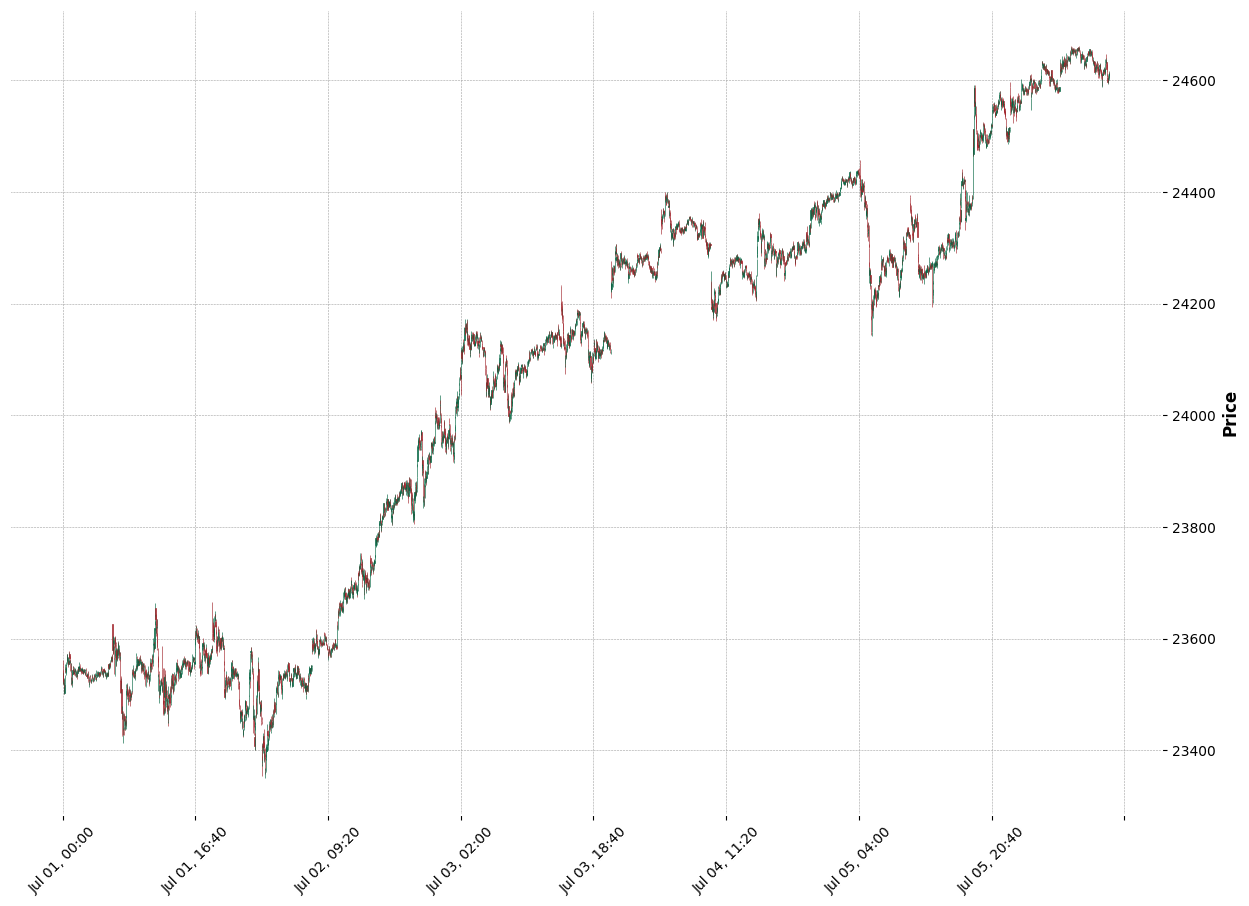

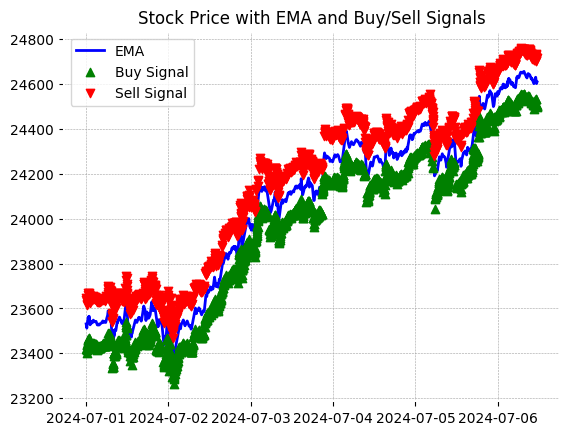

In [ ]:
data.index = pd.date_range('2024-07-01', periods=len(data), freq='2T')

# Plot candlestick chart
mpf.plot(data, type='candle', style='charles', ylabel='Price', ylabel_lower='Volume', figscale=2.0)

# Overlay EMA
plt.plot(data.index, data['EMA'], label='EMA', color='blue')

# Plot arrows for signals
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]
plt.scatter(buy_signals.index, buy_signals['Low'] - 100, marker='^', color='g', label='Buy Signal', zorder=5)
plt.scatter(sell_signals.index, sell_signals['High'] + 100, marker='v', color='r', label='Sell Signal', zorder=5)

# Display plot
plt.legend()
plt.title('Stock Price with EMA and Buy/Sell Signals')
plt.show()

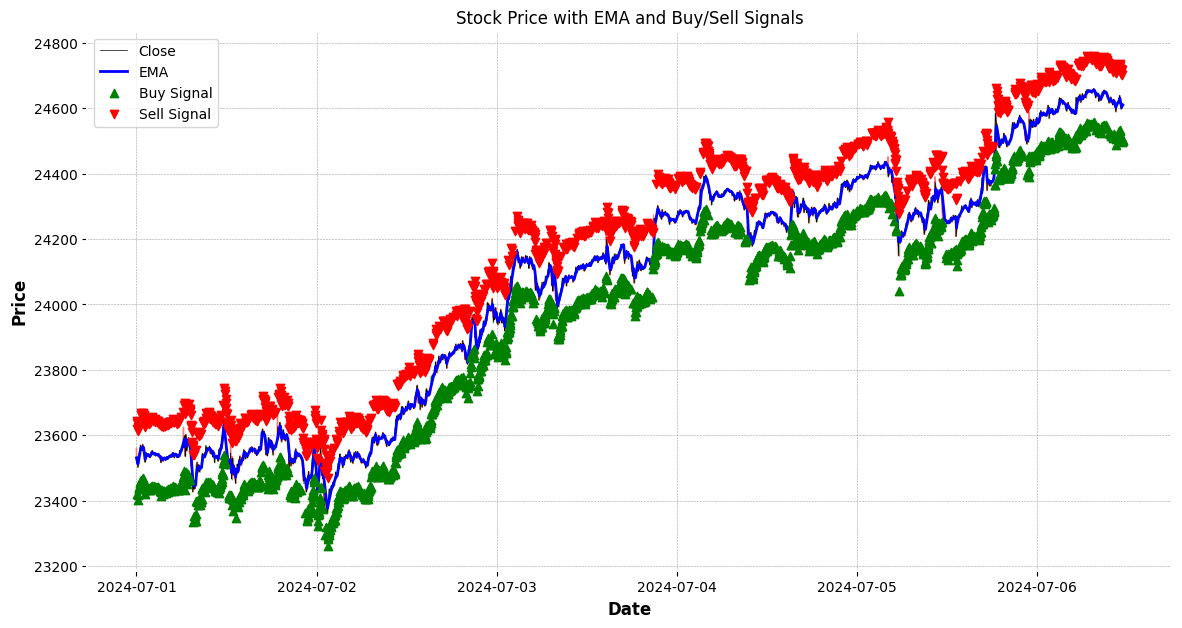

In [ ]:
# Set index as datetime
data.index = pd.date_range('2024-07-01', periods=len(data), freq='2T')

# Plotting with matplotlib and mplfinance
fig, ax = plt.subplots(figsize=(14, 7))

# Plot candlestick chart
ax.plot(data.index, data['Close'], label='Close', color='black', linestyle='-', linewidth=0.5)
ax.fill_between(data.index, data['Open'], data['Close'], where=data['Close'] >= data['Open'], facecolor='green', edgecolor='green', alpha=0.5)
ax.fill_between(data.index, data['Open'], data['Close'], where=data['Close'] < data['Open'], facecolor='red', edgecolor='red', alpha=0.5)

# Overlay EMA
ax.plot(data.index, data['EMA'], label='EMA', color='blue')

# Plot arrows for signals
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]
ax.scatter(buy_signals.index, buy_signals['Low'] - 100, marker='^', color='g', label='Buy Signal', zorder=5)
ax.scatter(sell_signals.index, sell_signals['High'] + 100, marker='v', color='r', label='Sell Signal', zorder=5)

# Format plot
ax.legend()
ax.set_title('Stock Price with EMA and Buy/Sell Signals')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Show plot
plt.show()

In [ ]:
data['Close_vs_EMA'] = (data['Close'] - data['EMA']) / data['Close']

In [ ]:
data['Target'] = np.where(data['Signal'] == 1, 1, np.where(data['Signal'] == -1, -1, 0))

feature selection
here taret is signals.

In [ ]:
features = ['Close', 'EMA', 'Close_vs_EMA']
X = data[features]
y = data['Target']

spliting data for train test split 80% for training and 20 % for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random forest regresor

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

accuracy calculation

In [ ]:

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("\nRandomForest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))


RandomForest Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       359
           1       1.00      1.00      1.00       430

    accuracy                           1.00       789
   macro avg       1.00      1.00      1.00       789
weighted avg       1.00      1.00      1.00       789



we got 99% accuracy from random forest regresser

k-nearest neighbors regresser

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)



accuracy check

In [ ]:
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("\nKNN Accuracy:", knn_accuracy)
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.9125475285171103
              precision    recall  f1-score   support

          -1       0.91      0.90      0.90       359
           1       0.92      0.92      0.92       430

    accuracy                           0.91       789
   macro avg       0.91      0.91      0.91       789
weighted avg       0.91      0.91      0.91       789



we got 94% accuracy using KNN regresser

keras regresser

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer (1 neuron for regression output)
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50
99/99 [==============================] - 5s 12ms/step - loss: 0.5484 - val_loss: 0.3577
Epoch 2/50
99/99 [==============================] - 1s 8ms/step - loss: 0.3503 - val_loss: 0.2324
Epoch 3/50
99/99 [==============================] - 1s 7ms/step - loss: 0.2473 - val_loss: 0.1574
Epoch 4/50
99/99 [==============================] - 1s 6ms/step - loss: 0.1871 - val_loss: 0.1136
Epoch 5/50
99/99 [==============================] - 1s 8ms/step - loss: 0.1433 - val_loss: 0.0952
Epoch 6/50
99/99 [==============================] - 0s 5ms/step - loss: 0.1253 - val_loss: 0.0782
Epoch 7/50
99/99 [==============================] - 1s 7ms/step - loss: 0.1101 - val_loss: 0.0705
Epoch 8/50
99/99 [==============================] - 1s 6ms/step - loss: 0.0945 - val_loss: 0.0602
Epoch 9/50
99/99 [==============================] - 0s 4ms/step - loss: 0.0855 - val_loss: 0.0591
Epoch 10/50
99/99 [==============================] - 1s 7ms/step - loss: 0.0812 - val_loss: 0.0517
Epoch 11/50
99/99 

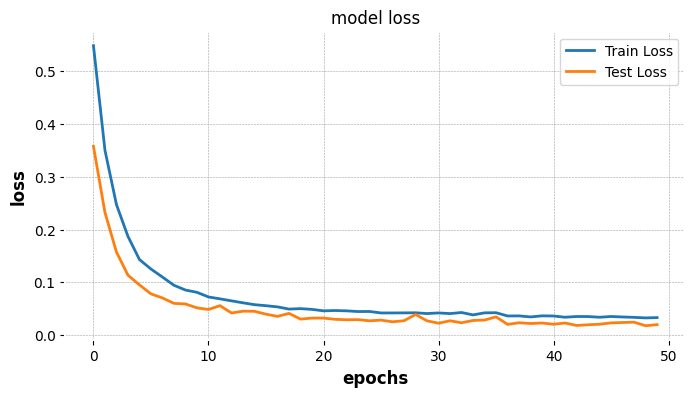

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.show()

In [ ]:

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

25/25 [==============================] - 0s 4ms/step
Mean Squared Error: 0.02


as mean squared error is 0.01 is very less i.e. more acurate
as actual and predicted values is showing very less error.


In [ ]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  97.91580299919755


deep learning - deep neural network accuracy is 98.88 %


In [ ]:
#comparing accuracy of all the models
acc = {'model':['random forest','KNN','Deep neural network'],'accuracy':[rf_accuracy*100,knn_accuracy*100,dnn_acc]}

In [ ]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,random forest,100.000000
1,KNN,91.254753
2,Deep neural network,97.915803


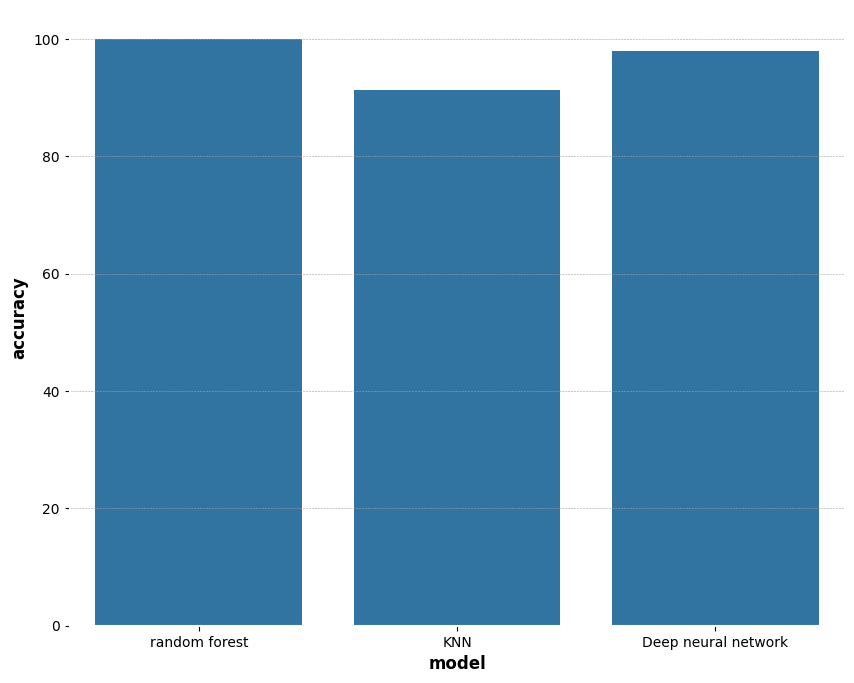

In [ ]:
#comparing accuracy of all the models

plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()

random forest regressor gives high accuracy
